In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Specify URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Initialize variables
city_number = 1
city_weather_dict = {}
weather_data_list = []

# Build query URL
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city

    # Make request, store response and JSON-ify response to convert data to a dictionary
    response = requests.get(query_url).json()
    try:
        # Get and print city number and name
        city_name = response["name"]    
        print(f"The city number is {city_number} and city name is {city_name}.")
        city_cloudiness = response["clouds"]["all"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_humidity = response["main"]["humidity"]
        city_lat = response["coord"]["lat"]
        city_lon = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_wind_speed = response["wind"]["speed"]
        
        # Build dictionary
        city_weather_dict = {
            "name": city_name,
            "cloudiness": city_cloudiness,
            "country": city_country,
            "date": city_date,
            "humidity": city_humidity,
            "latitude": city_lat,
            "longitude": city_lon,
            "max temperature": city_max_temp,
            "wind speed": city_wind_speed
        }
        
        # Add dictionary to list
        weather_data_list.append(city_weather_dict)
        
        # Increment city number
        city_number = city_number + 1
    except:
        continue
   
weather_data_df = pd.DataFrame(weather_data_list)
weather_data_df


The city number is 1 and city name is Hofn.
The city number is 2 and city name is Bluff.
The city number is 3 and city name is New Norfolk.
The city number is 4 and city name is Albany.
The city number is 5 and city name is Aden.
The city number is 6 and city name is Ushuaia.
The city number is 7 and city name is Hasaki.
The city number is 8 and city name is Araouane.
The city number is 9 and city name is Ilulissat.
The city number is 10 and city name is Jamestown.
The city number is 11 and city name is Olutanga.
The city number is 12 and city name is Macusani.
The city number is 13 and city name is Avarua.
The city number is 14 and city name is Punta Arenas.
The city number is 15 and city name is Saint-Pierre.
The city number is 16 and city name is Rikitea.
The city number is 17 and city name is Pisco.
The city number is 18 and city name is Alofi.
The city number is 19 and city name is Ambanja.
The city number is 20 and city name is Kapaa.
The city number is 21 and city name is Port-G

The city number is 168 and city name is Dingle.
The city number is 169 and city name is Katherine.
The city number is 170 and city name is Gazanjyk.
The city number is 171 and city name is Bodden Town.
The city number is 172 and city name is Byron Bay.
The city number is 173 and city name is Los Alamos.
The city number is 174 and city name is Hualmay.
The city number is 175 and city name is Aklavik.
The city number is 176 and city name is Juba.
The city number is 177 and city name is Vostok.
The city number is 178 and city name is Tiksi.
The city number is 179 and city name is Thunder Bay.
The city number is 180 and city name is Wenatchee.
The city number is 181 and city name is Butaritari.
The city number is 182 and city name is Hobart.
The city number is 183 and city name is Viedma.
The city number is 184 and city name is Rio Grande.
The city number is 185 and city name is Goya.
The city number is 186 and city name is Fukuma.
The city number is 187 and city name is Ahipara.
The city 

The city number is 331 and city name is Porto Novo.
The city number is 332 and city name is Airai.
The city number is 333 and city name is Atambua.
The city number is 334 and city name is Sobolevo.
The city number is 335 and city name is Broome.
The city number is 336 and city name is Vao.
The city number is 337 and city name is Salinopolis.
The city number is 338 and city name is Santa Maria.
The city number is 339 and city name is Puerto Escondido.
The city number is 340 and city name is Iqaluit.
The city number is 341 and city name is Ampanihy.
The city number is 342 and city name is Flinders.
The city number is 343 and city name is San Patricio.
The city number is 344 and city name is Pyay.
The city number is 345 and city name is Pavlohrad.
The city number is 346 and city name is Shambu.
The city number is 347 and city name is Ilave.
The city number is 348 and city name is Ferrol.
The city number is 349 and city name is Rekhasim.
The city number is 350 and city name is Puerto Ayacu

The city number is 495 and city name is Hauterive.
The city number is 496 and city name is Sirnach.
The city number is 497 and city name is Galle.
The city number is 498 and city name is Nhulunbuy.
The city number is 499 and city name is Uporovo.
The city number is 500 and city name is Maceio.
The city number is 501 and city name is Mount Isa.
The city number is 502 and city name is Puerto El Triunfo.
The city number is 503 and city name is Turukhansk.
The city number is 504 and city name is Trelew.
The city number is 505 and city name is Timra.
The city number is 506 and city name is Kabare.
The city number is 507 and city name is Sambava.
The city number is 508 and city name is Jadu.
The city number is 509 and city name is Yuzhne.
The city number is 510 and city name is Baraki Barak.
The city number is 511 and city name is Port Blair.
The city number is 512 and city name is Katubao.
The city number is 513 and city name is Katastarion.
The city number is 514 and city name is Daru.
The

,cloudiness,country,date,humidity,latitude,longitude,max temperature,name,wind speed
0,48,IS,1549225860,100,64.25,-15.21,29.31,Hofn,5.06
1,100,AU,1549225861,85,-23.58,149.07,73.77,Bluff,12.77
2,40,AU,1549224000,87,-42.78,147.06,60.80,New Norfolk,5.82
3,20,US,1549223640,54,42.65,-73.75,42.98,Albany,9.17
4,8,YE,1549225710,100,12.79,45.03,76.52,Aden,11.77
5,20,AR,1549224000,55,-54.81,-68.31,64.40,Ushuaia,24.16
6,75,JP,1549224000,77,35.73,140.83,62.60,Hasaki,21.92
7,32,ML,1549225865,33,18.90,-3.53,65.49,Araouane,9.19
8,0,GL,1549223400,34,69.22,-51.10,21.20,Ilulissat,18.34
9,0,AU,1549225726,63,-33.21,138.60,62.88,Jamestown,12.77


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert Data Frame to csv & save
weather_data_df.to_csv("./weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

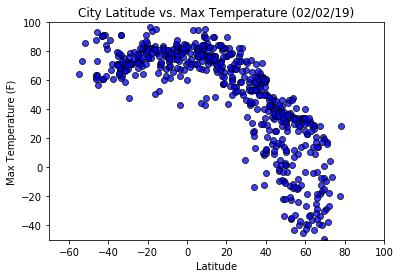

<Figure size 432x288 with 0 Axes>

In [6]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["max temperature"]

# Set Limits
plt.ylim(-50, 100)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevMaxTemp.png")

#### Latitude vs. Humidity Plot

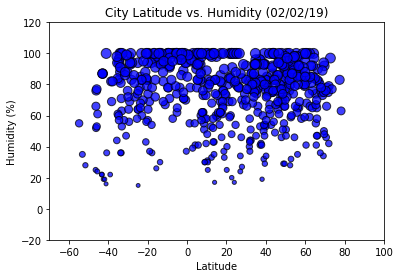

<Figure size 432x288 with 0 Axes>

In [7]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["humidity"]

# Set Limits
plt.ylim(-20, 120)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, s=y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevHumidity.png")

#### Latitude vs. Cloudiness Plot

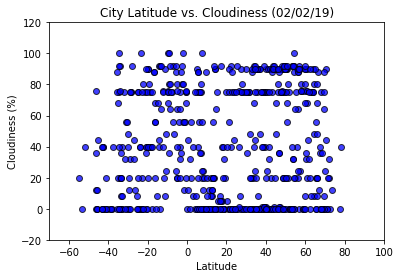

<Figure size 432x288 with 0 Axes>

In [8]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["cloudiness"]

# Set Limits
plt.ylim(-20, 120)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevCloudiness.png")

#### Latitude vs. Wind Speed Plot

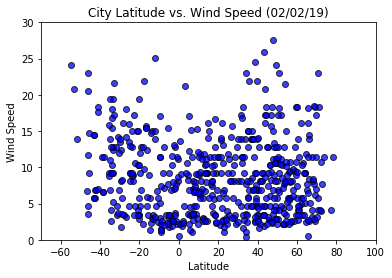

<Figure size 432x288 with 0 Axes>

In [9]:
# Set x and y-axes
x_axis = weather_data_df["latitude"]
y_axis = weather_data_df["wind speed"]

# Set Limits
plt.ylim(0, 30)  
plt.xlim(-70, 100)

# Build Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (02/02/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print visualization
plt.show()

# Save the plotted figures as .pngs
plt.savefig("./LatitudevWindSpeed.png")

ANALYSIS

1)  Latitude and temperature have an indirect coorelation with the Equator and the north-south poles.  The data shows cities between the Equator and the north pole have the coldest temperatures and cities between the Equator and the south pole have the warmest temperatures.  The farther north you move from the equator, the lower the maximum temperature because of the effect of the tilt of the Earth has on creating seasons (i.e. The northern hemisphere is experiencing winter currently.)

2)  Higher wind speeds are more prevalent farther from to the equator.   Wind speeds increase as you move away from the Equator.  This is most likely caused by more drastic differences in temperature between the hottest point of the day and coldest point of the day. 

3)  The places on Earth that have 100% humidity are located between -40 and 80 degrees latitude.   So, the poles do not experience 100% humidity, but nearly everywhere else on Earth shows a range between 20% and 100% humidity. 
  